In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [6]:
columns_names=["id","place","flag","tweets"]
df=pd.read_csv(r"/content/twitter_training.csv",names=columns_names)

In [7]:
df.head()

,id,place,flag,tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74682 non-null  int64 
 1   place   74682 non-null  object
 2   flag    74682 non-null  object
 3   tweets  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
df["flag"].value_counts()

,count
flag,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [10]:
port_stem=PorterStemmer()

In [11]:
def stemming(content):
  stemmed_content=re.sub("[^a-zA-Z]"," ",content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words("english")]
  stemmed_content=" ".join(stemmed_content)
  return stemmed_content

In [15]:
df["tweets"] = df["tweets"].fillna("")
df["Stemmed_content"] = df["tweets"].apply(stemming)


In [16]:
df.head()

,id,place,flag,tweets,Stemmed_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im get borderland murder


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               74682 non-null  int64 
 1   place            74682 non-null  object
 2   flag             74682 non-null  object
 3   tweets           74682 non-null  object
 4   Stemmed_content  74682 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [28]:
df["Stemmed_content"].isna().sum()

np.int64(0)

/tmp/ipython-input-3577428384.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='flag', palette='Set2')


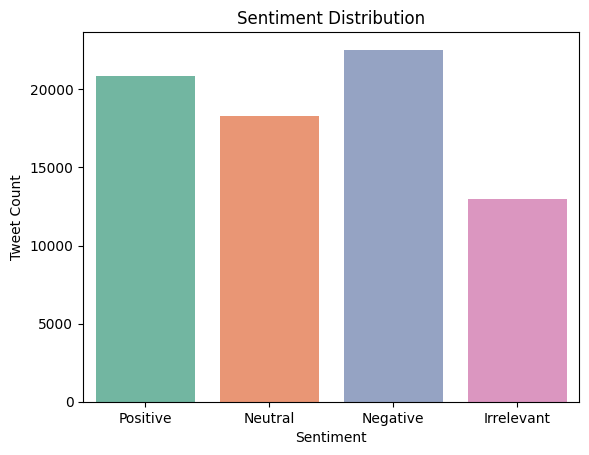

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='flag', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


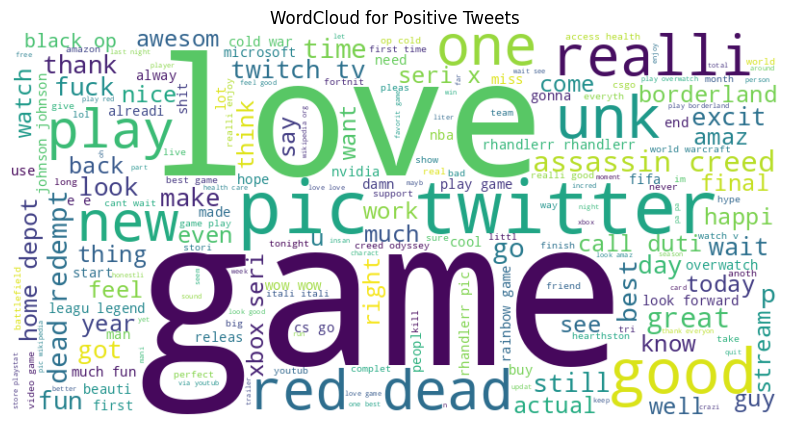

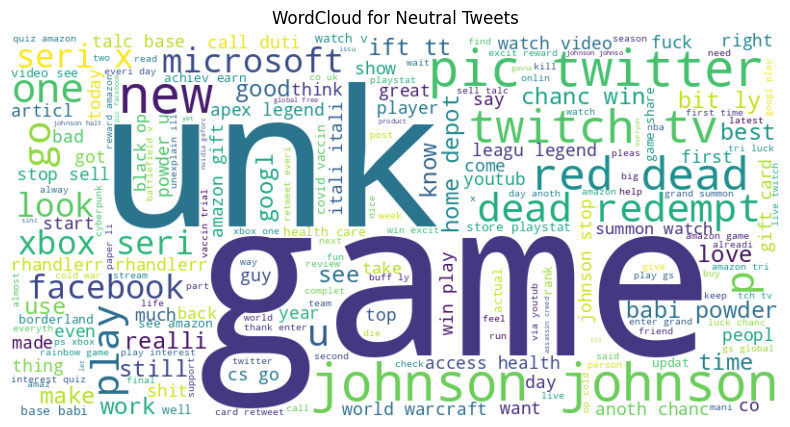

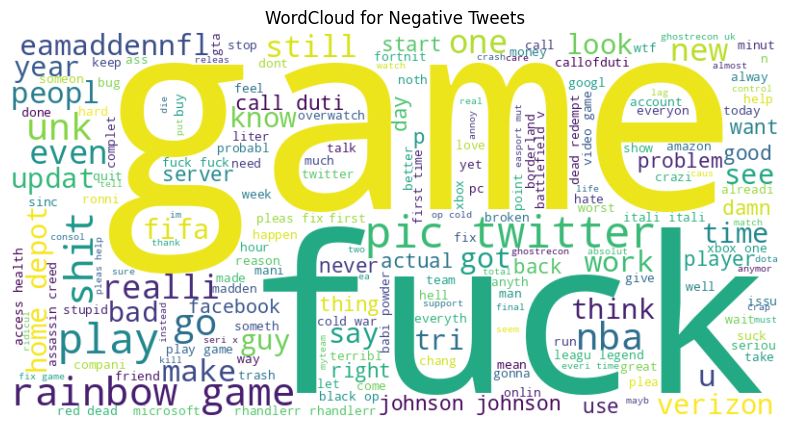

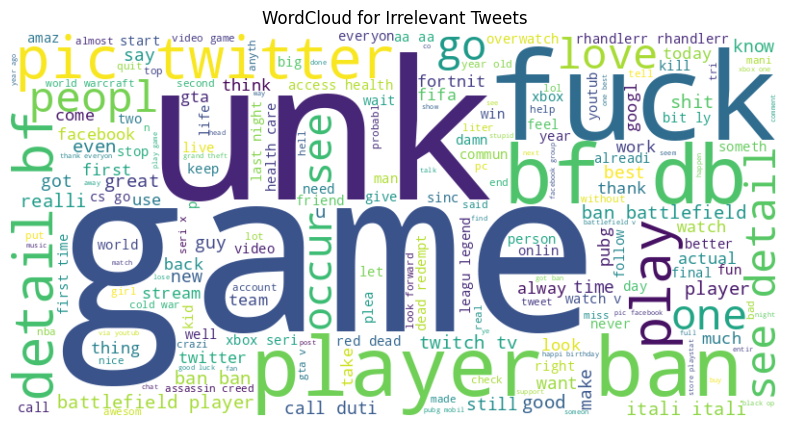

In [50]:
from wordcloud import WordCloud

for label in df['flag'].unique():
    text = " ".join(df[df['flag'] == label]['Stemmed_content'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label} Tweets')
    plt.show()


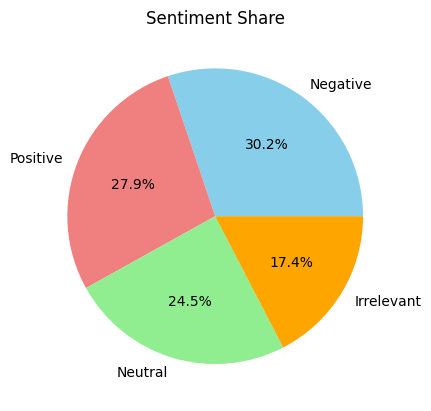

In [55]:
df['flag'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue','lightcoral','lightgreen','orange'])
plt.title('Sentiment Share')
plt.ylabel('')
plt.show()


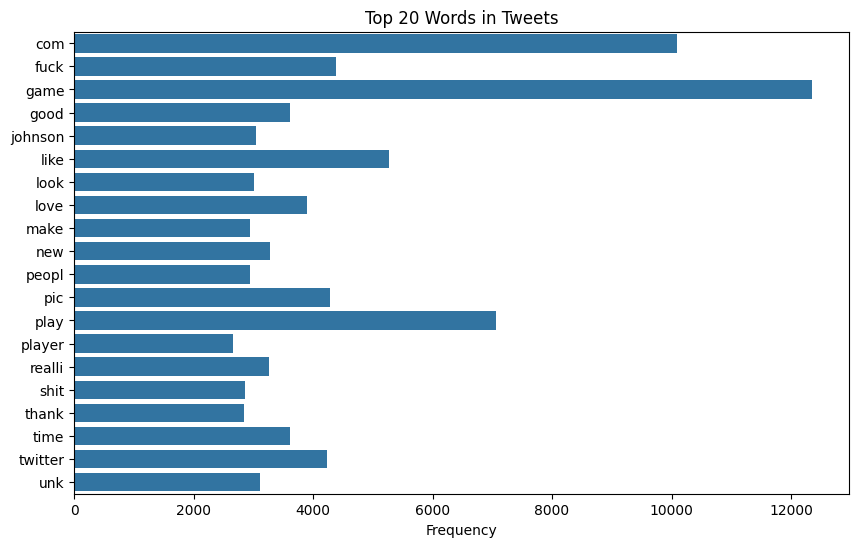

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['Stemmed_content'])

words = vectorizer.get_feature_names_out()
counts = X.toarray().sum(axis=0)

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=words)
plt.title("Top 20 Words in Tweets")
plt.xlabel("Frequency")
plt.show()


In [17]:
X=df["Stemmed_content"]
y=df["flag"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(X_train.shape,X_test.shape)

(59745,) (14937,)


In [31]:
X_train.head()

,Stemmed_content
8581,good ambarkortiz mad turn bag bastion lol swee...
71534,must say everi moment fun breakpoint serv leas...
67252,busi awesomecapit johnson meyer johnson busi r...
41061,found perfect flamethrow imag scocont scohellf...
16591,first time eu commiss taken step


In [32]:
# Step 1: Vectorize only raw text
vectorizer = TfidfVectorizer()

# Assume X_train and X_test are still Series of text
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [33]:
model=LogisticRegression(max_iter=100)


In [35]:
model.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred=model.predict(X_test_tfidf)

In [38]:
comparing_df=pd.DataFrame({"Actual values":y_test,"predicted values":y_pred})

In [39]:
comparing_df.head()

,Actual values,predicted values
34877,Irrelevant,Irrelevant
21704,Positive,Positive
47008,Negative,Negative
7969,Irrelevant,Negative
454,Positive,Positive


In [41]:
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))

Confusion matrix:
 [[1673  295  224  400]
 [ 141 3709  231  438]
 [ 148  424 2539  485]
 [ 160  321  283 3466]]


In [42]:
df["flag"].value_counts()

,count
flag,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [43]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

  Irrelevant       0.79      0.65      0.71      2592
    Negative       0.78      0.82      0.80      4519
     Neutral       0.77      0.71      0.74      3596
    Positive       0.72      0.82      0.77      4230

    accuracy                           0.76     14937
   macro avg       0.77      0.75      0.75     14937
weighted avg       0.76      0.76      0.76     14937



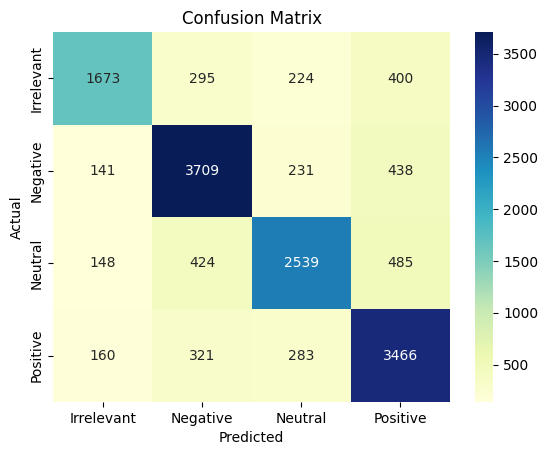

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
